In [1]:
import numpy as np
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datadir = '/media/nknezek/compute_storage/computed_solutions_nature/'
all_data = csv.writer(open(datadir+'all_data.csv','w'))
ri05p_data = csv.writer(open(datadir+'ri05p_data.csv','w'))
ri05p_l6000K_data = csv.writer(open(datadir+'ri05p_l6000K_data.csv','w'))
ri10p_data = csv.writer(open(datadir+'ri10p_data.csv','w'))

In [3]:
# percent_ric = 0.05

# tofile = './valid_results/'

for i in [0,1,2,3]:
    reader = csv.reader(open(datadir+'run_data{}.csv'.format(i),'r'))
    for row in reader:
        all_data.writerow(row)
        if np.abs(float(row[1])/1220e3-1) < 0.05:
            ri05p_data.writerow(row)
            if float(row[2])<=6000:
                ri05p_l6000K_data.writerow(row)
        if np.abs(float(row[1])/1220e3-1) < 0.10:
            ri10p_data.writerow(row)
         
#             foldername = "./Tc{:.1f}_XM{:.3f}_XS{:.3f}_XO{:.3f}/".format(float(row[2]), float(row[3]), float(row[4]), float(row[5]))
#             os.system('cp {fr} {to}'.format(fr=foldername, to=tofile))

In [4]:
dfall = pd.read_csv(datadir+'all_data.csv', names=['time', 'r_i', 'T_cmb0', 'X_Mg_0', 'X_Si_0', 'X_O_0', 'MgNumFp', 'MgNumPv', 'X_MgFeO_b', 'X_SiO2_b', 'nu_present', 'deltaT0', 'layer_thickness', 'overturn'])

In [5]:
dfall['T_cmb0'].unique()

array([4900., 5000., 5100., 5200., 5300., 5400., 5500., 5600., 5700.,
       5800., 5900., 6000.])

In [6]:
dfall.describe()

,r_i,T_cmb0,X_Mg_0,X_Si_0,X_O_0,MgNumFp,MgNumPv,X_MgFeO_b,X_SiO2_b,nu_present,deltaT0,layer_thickness,overturn
count,1.469400e+04,42685.000000,42685.000000,42685.000000,42685.000000,4.268500e+04,4.268500e+04,42685.000,4.268500e+04,4.268500e+04,42685.000000,42685.0,42685.0
mean,1.259962e+06,5348.391707,0.026813,0.079527,0.118941,8.000000e-01,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2397.962714,100.0,600.0
std,7.971603e+05,343.112415,0.016566,0.045229,0.057846,1.110236e-16,1.110236e-16,0.000,8.673719e-18,0.000000e+00,142.156455,0.0,0.0
min,0.000000e+00,4900.000000,0.000010,0.000010,0.000010,8.000000e-01,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2212.187519,100.0,600.0
25%,6.187666e+05,5000.000000,0.010008,0.040007,0.080000,8.000000e-01,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2253.618971,100.0,600.0
50%,1.480565e+06,5300.000000,0.030004,0.080005,0.130000,8.000000e-01,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2377.913327,100.0,600.0
75%,1.910703e+06,5600.000000,0.040002,0.120000,0.170001,8.000000e-01,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2502.207683,100.0,600.0
max,3.480000e+06,6000.000000,0.050000,0.150000,0.200000,8.000000e-01,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2667.933491,100.0,600.0


# Play with valid solutions within 5%, Tc<6000K

In [7]:
df05l6000 = pd.read_csv(datadir+'ri05p_l6000K_data.csv', names=['time', 'r_i', 'T_cmb0', 'X_Mg_0', 'X_Si_0', 'X_O_0', 'MgNumFp', 'MgNumPv', 'X_MgFeO_b', 'X_SiO2_b', 'nu_present', 'deltaT0', 'layer_thickness', 'overturn'])

In [8]:
df05l6000.describe()

,r_i,T_cmb0,X_Mg_0,X_Si_0,X_O_0,MgNumFp,MgNumPv,X_MgFeO_b,X_SiO2_b,nu_present,deltaT0,layer_thickness,overturn
count,5.940000e+02,594.000000,594.000000,594.000000,594.000000,5.940000e+02,5.940000e+02,5.940000e+02,594.000,5.940000e+02,594.000000,594.0,594.0
mean,1.223859e+06,5644.612795,0.021571,0.071434,0.078555,8.000000e-01,9.300000e-01,3.110000e-01,0.015,2.000000e+17,2520.691412,100.0,600.0
std,3.515965e+04,155.981152,0.017040,0.044885,0.039569,1.111159e-16,1.111159e-16,5.555794e-17,0.000,0.000000e+00,64.625256,0.0,0.0
min,1.159120e+06,5100.000000,0.000010,0.000010,0.000010,8.000000e-01,9.300000e-01,3.110000e-01,0.015,2.000000e+17,2295.050423,100.0,600.0
25%,1.193805e+06,5500.000000,0.010008,0.030008,0.050000,8.000000e-01,9.300000e-01,3.110000e-01,0.015,2.000000e+17,2460.776231,100.0,600.0
50%,1.226756e+06,5600.000000,0.020006,0.070000,0.070000,8.000000e-01,9.300000e-01,3.110000e-01,0.015,2.000000e+17,2502.207683,100.0,600.0
75%,1.254465e+06,5700.000000,0.040002,0.110000,0.100000,8.000000e-01,9.300000e-01,3.110000e-01,0.015,2.000000e+17,2543.639135,100.0,600.0
max,1.280755e+06,6000.000000,0.050000,0.150000,0.200000,8.000000e-01,9.300000e-01,3.110000e-01,0.015,2.000000e+17,2667.933491,100.0,600.0


# Play with valid solutions within 5%

In [9]:
df05 = pd.read_csv(datadir+'ri05p_data.csv', names=['time', 'r_i', 'T_cmb0', 'X_Mg_0', 'X_Si_0', 'X_O_0', 'MgNumFp', 'MgNumPv', 'X_MgFeO_b', 'X_SiO2_b', 'nu_present', 'deltaT0', 'layer_thickness', 'overturn'])

In [10]:
df05.describe()

,r_i,T_cmb0,X_Mg_0,X_Si_0,X_O_0,MgNumFp,MgNumPv,X_MgFeO_b,X_SiO2_b,nu_present,deltaT0,layer_thickness,overturn
count,5.940000e+02,594.000000,594.000000,594.000000,594.000000,5.940000e+02,5.940000e+02,5.940000e+02,594.000,5.940000e+02,594.000000,594.0,594.0
mean,1.223859e+06,5644.612795,0.021571,0.071434,0.078555,8.000000e-01,9.300000e-01,3.110000e-01,0.015,2.000000e+17,2520.691412,100.0,600.0
std,3.515965e+04,155.981152,0.017040,0.044885,0.039569,1.111159e-16,1.111159e-16,5.555794e-17,0.000,0.000000e+00,64.625256,0.0,0.0
min,1.159120e+06,5100.000000,0.000010,0.000010,0.000010,8.000000e-01,9.300000e-01,3.110000e-01,0.015,2.000000e+17,2295.050423,100.0,600.0
25%,1.193805e+06,5500.000000,0.010008,0.030008,0.050000,8.000000e-01,9.300000e-01,3.110000e-01,0.015,2.000000e+17,2460.776231,100.0,600.0
50%,1.226756e+06,5600.000000,0.020006,0.070000,0.070000,8.000000e-01,9.300000e-01,3.110000e-01,0.015,2.000000e+17,2502.207683,100.0,600.0
75%,1.254465e+06,5700.000000,0.040002,0.110000,0.100000,8.000000e-01,9.300000e-01,3.110000e-01,0.015,2.000000e+17,2543.639135,100.0,600.0
max,1.280755e+06,6000.000000,0.050000,0.150000,0.200000,8.000000e-01,9.300000e-01,3.110000e-01,0.015,2.000000e+17,2667.933491,100.0,600.0


In [11]:
df05['T_cmb0'].unique()

array([5100., 5400., 5300., 5500., 5600., 5700., 5800., 5900., 6000.])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2b0b66978>]],
      dtype=object)

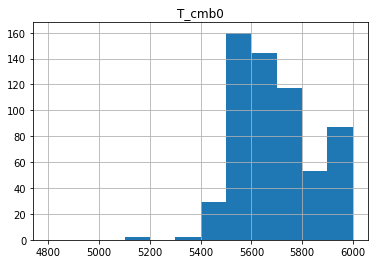

In [12]:
df05.hist('T_cmb0',bins=np.linspace(4800,6000,13))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2aea479b0>]],
      dtype=object)

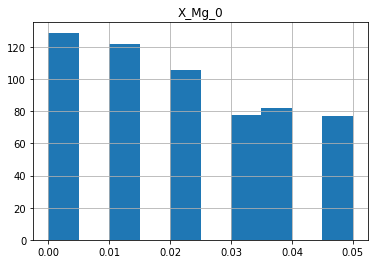

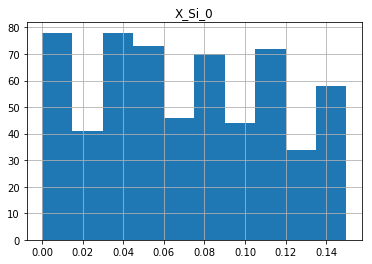

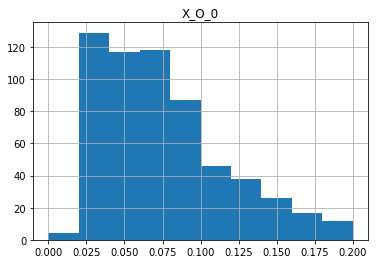

In [13]:
df05.hist('X_Mg_0')
df05.hist('X_Si_0')
df05.hist('X_O_0')

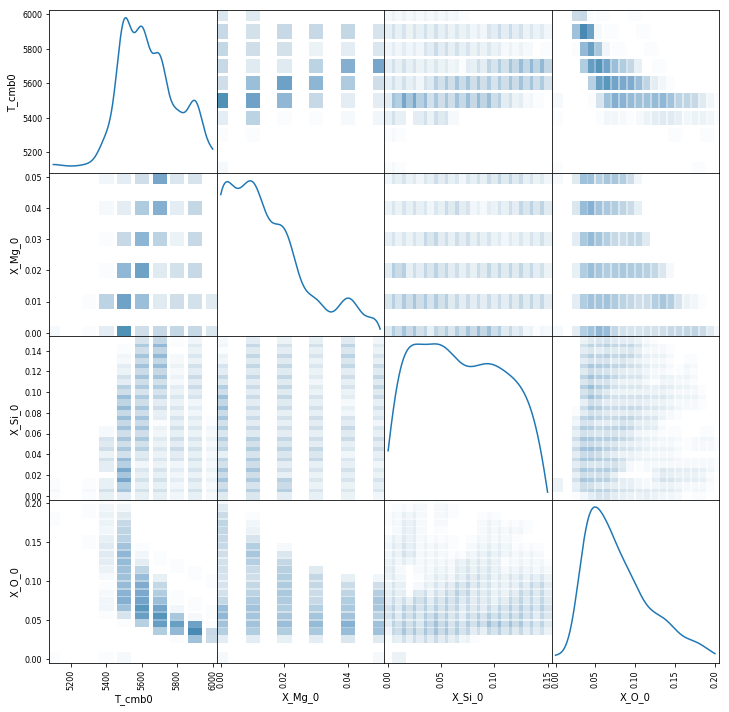

In [14]:
pd.plotting.scatter_matrix(df05[['T_cmb0','X_Mg_0','X_Si_0','X_O_0']], alpha=0.02, figsize=(12, 12), diagonal='kde', marker='s', s=200)
plt.savefig('ri05p_scatter_matrix.pdf')

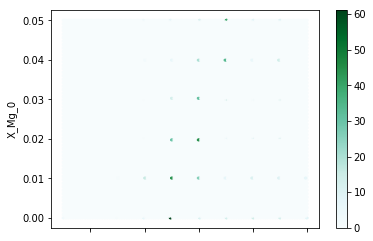

In [15]:
df05.plot(kind='hexbin', x='T_cmb0',y='X_Mg_0',)

# Play with valid solutions within 10%

In [16]:
df10 = pd.read_csv(datadir+'ri10p_data.csv', names=['time', 'r_i', 'T_cmb0', 'X_Mg_0', 'X_Si_0', 'X_O_0', 'MgNumFp', 'MgNumPv', 'X_MgFeO_b', 'X_SiO2_b', 'nu_present', 'deltaT0', 'layer_thickness', 'overturn'])

In [17]:
df10.describe()

,r_i,T_cmb0,X_Mg_0,X_Si_0,X_O_0,MgNumFp,MgNumPv,X_MgFeO_b,X_SiO2_b,nu_present,deltaT0,layer_thickness,overturn
count,1.245000e+03,1245.000000,1245.000000,1245.000000,1245.000000,1.245000e+03,1.245000e+03,1.245000e+03,1.245000e+03,1.245000e+03,1245.000000,1245.0,1245.0
mean,1.226711e+06,5648.594378,0.020986,0.074092,0.077345,8.000000e-01,9.300000e-01,3.110000e-01,1.500000e-02,2.000000e+17,2522.341039,100.0,600.0
std,7.060492e+04,173.367536,0.016703,0.046352,0.039314,1.110669e-16,1.110669e-16,5.553346e-17,3.470841e-18,0.000000e+00,71.828687,0.0,0.0
min,1.098034e+06,5000.000000,0.000010,0.000010,0.000010,8.000000e-01,9.300000e-01,3.110000e-01,1.500000e-02,2.000000e+17,2253.618971,100.0,600.0
25%,1.168174e+06,5500.000000,0.010008,0.030008,0.050000,8.000000e-01,9.300000e-01,3.110000e-01,1.500000e-02,2.000000e+17,2460.776231,100.0,600.0
50%,1.233969e+06,5600.000000,0.020006,0.070005,0.070000,8.000000e-01,9.300000e-01,3.110000e-01,1.500000e-02,2.000000e+17,2502.207683,100.0,600.0
75%,1.286526e+06,5800.000000,0.030004,0.110003,0.100000,8.000000e-01,9.300000e-01,3.110000e-01,1.500000e-02,2.000000e+17,2585.070587,100.0,600.0
max,1.341482e+06,6000.000000,0.050000,0.150000,0.200000,8.000000e-01,9.300000e-01,3.110000e-01,1.500000e-02,2.000000e+17,2667.933491,100.0,600.0


In [18]:
df10['T_cmb0'].unique()

array([5000., 5100., 5400., 5200., 5300., 5500., 5600., 5700., 5800.,
       5900., 6000.])

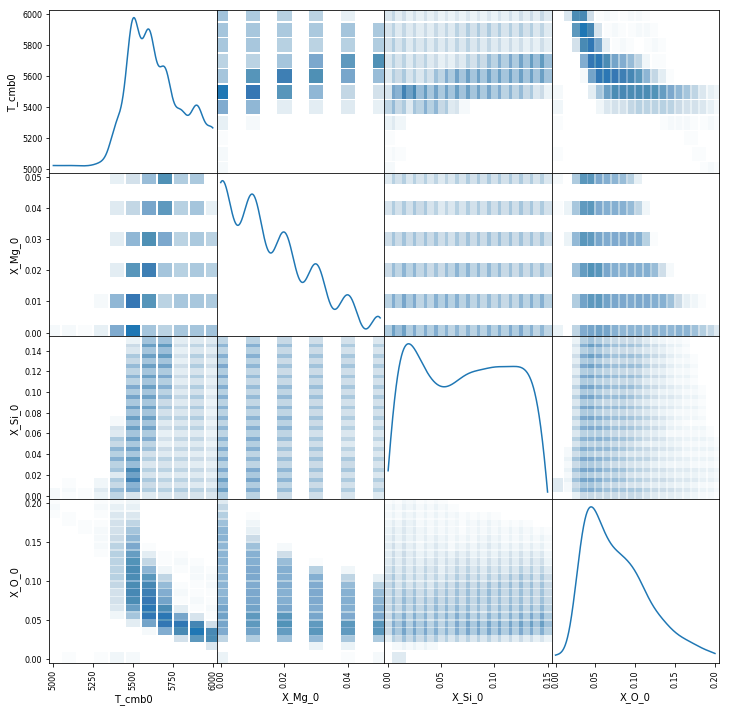

In [19]:
pd.plotting.scatter_matrix(df10[['T_cmb0','X_Mg_0','X_Si_0','X_O_0']], alpha=0.02, figsize=(12, 12), diagonal='kde', marker='s', s=200)
plt.savefig('ri10p_scatter_matrix.pdf')